## Load Data Set

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from keras.datasets import cifar100
from keras.utils import to_categorical
import numpy as np
import cv2
import os
from keras import backend as K

In [3]:
(x_train, y_train_), (x_test, y_test_) = cifar100.load_data()


169009152/169001437 [==============================] - 6s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
y_train = to_categorical(y_train_)
y_test = to_categorical(y_test_)

# VGGNet16 Model

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.callbacks import EarlyStopping
import os

In [7]:
input_shape = (32, 32, 3)
model = Sequential()

In [8]:
# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu',padding='same', input_shape=input_shape))
# model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='elu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', data_format='channels_last'))
# model.add(Dropout(0.2))

In [9]:
model.add(Conv2D(filters=64, kernel_size=(3, 3),padding='same', activation='elu', input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3),padding='same', activation='elu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', data_format='channels_last'))


In [10]:
model.add(Conv2D(filters=128, kernel_size=(3, 3),padding='same', activation='elu'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3, 3),padding='same', activation='elu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', data_format='channels_last'))

In [11]:
model.add(Conv2D(filters=256, kernel_size=(3, 3),padding='same', activation='elu'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=256, kernel_size=(3, 3),padding='same', activation='elu'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=256, kernel_size=(3, 3),padding='same', activation='elu'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=256, kernel_size=(3, 3),padding='same', activation='elu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', data_format='channels_last'))

In [12]:
model.add(Flatten())
model.add(Dense(4096, activation='elu'))
model.add(Dense(4096, activation='elu'))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 128)       0

In [13]:
opt = keras.optimizers.Adam(learning_rate=0.0001, clipnorm=5)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=["accuracy"])
callback = EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(x_test, y_test), callbacks=[callback])
model.save_weights(filepath=F"/content/gdrive/My Drive/Checkpoints/VGGNet16_ADAM_Dropouts.h5")

Epoch 1/200
391/391 [==============================] - 9s 24ms/step - loss: 3.7925 - accuracy: 0.1295 - val_loss: 7.8400 - val_accuracy: 0.0558
Epoch 2/200
391/391 [==============================] - 9s 23ms/step - loss: 3.0936 - accuracy: 0.2504 - val_loss: 5.5930 - val_accuracy: 0.1160
Epoch 3/200
391/391 [==============================] - 9s 23ms/step - loss: 2.7439 - accuracy: 0.3183 - val_loss: 3.6164 - val_accuracy: 0.2461
Epoch 4/200
391/391 [==============================] - 9s 23ms/step - loss: 2.4796 - accuracy: 0.3710 - val_loss: 3.1083 - val_accuracy: 0.3055
Epoch 5/200
391/391 [==============================] - 9s 22ms/step - loss: 2.2697 - accuracy: 0.4123 - val_loss: 2.9673 - val_accuracy: 0.3445
Epoch 6/200
391/391 [==============================] - 9s 22ms/step - loss: 2.0947 - accuracy: 0.4537 - val_loss: 2.9518 - val_accuracy: 0.3616
Epoch 7/200
391/391 [==============================] - 9s 22ms/step - loss: 1.9240 - accuracy: 0.4912 - val_loss: 2.8009 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


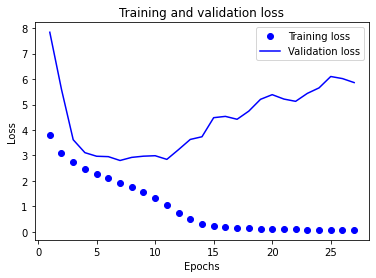

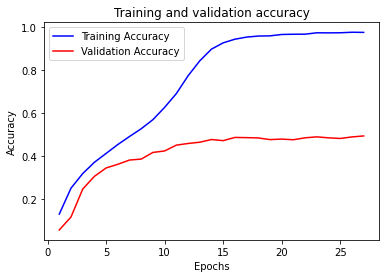

In [14]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2

history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
train_acc = history_dict['accuracy']
test_acc = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


plt2.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt2.plot(epochs, test_acc, color = 'red', label='Validation Accuracy')
plt2.title('Training and validation accuracy')
plt2.xlabel('Epochs')
plt2.ylabel('Accuracy')
plt2.legend()

plt2.show()

In [15]:
y_pred = model.predict(x_test).argmax(-1)
import sklearn.metrics as metrics
print(metrics.classification_report(y_test.argmax(axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       100
           1       0.67      0.58      0.62       100
           2       0.52      0.37      0.43       100
           3       0.27      0.23      0.25       100
           4       0.32      0.38      0.35       100
           5       0.55      0.36      0.43       100
           6       0.43      0.50      0.46       100
           7       0.33      0.60      0.42       100
           8       0.57      0.71      0.63       100
           9       0.63      0.67      0.65       100
          10       0.33      0.25      0.29       100
          11       0.32      0.35      0.34       100
          12       0.74      0.48      0.58       100
          13       0.45      0.41      0.43       100
          14       0.45      0.34      0.39       100
          15       0.51      0.39      0.44       100
          16       0.54      0.56      0.55       100
          17       0.63    

In [16]:
# model.load_weights(filepath=F"/content/gdrive/My Drive/Checkpoints/VGGNet16_ADAM_Dropouts.h5")

model.load_weights("VGGNet16_ADAM_Dropouts.h5")

In [17]:
result = model.evaluate(batch_size=128, x=x_test, y=y_test)
dict(zip(model.metrics_names,result))

79/79 [==============================] - 1s 7ms/step - loss: 5.8620 - accuracy: 0.4937


{'accuracy': 0.4936999976634979, 'loss': 5.861963748931885}